# Marketingová kampaň pro banku

In [34]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, precision_score


# import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

Stáhni si data o výsledcích marketingové kampaně jedné portugalské banky, které jsou v souboru `ukol_04_data.csv`. Data mají následující proměnné.

První skupina proměnných zahrnuje obecné informace o klientovi/klientce.

- `age` = věk (číslo)
- `job` = typ zaměstnání (kategorická proměnná, obsahuje následující možnostti: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
- `marital` = rodinný stav (kategorická proměnná, obsahuje možnosti "married","divorced","single", "divorced" zahrnuje rozvedené i ovdovělé)
- `education` = vzdělání (kategorická proměnná, obsahuje následující možnosti: "unknown","secondary","primary","tertiary")
- `default` = má úvěr v prodlení (binární proměnná, obsahuje možnosti "yes","no")
- `balance` = průměrný zůstatek na účtu (numerická proměnná, v eurech)
- `housing` = má úvěr na bydlení (binární proměnná, obsahuje možnosti "yes", "no")
- `loan` = má osobní půjčku (binární proměnná, zahrnuje možnosti "yes","no")


Druhá skupina proměnných se týká posledního kontaktu v aktuální kampani

- `contact` = způsob navázání kontaktu (kategorická proměnná, obsahuje možnosti "unknown","telephone","cellular")
- `day` = den v měsíci posledního kontaktu (číselná proměnná)
- `month` = měsíc posledního kontaktu (kategoriální proměnná, obsahuje možnosti "jan", "feb", "mar", …, "nov", "dec")
- `duration` = délka posledního kontaktu v sekundách (číselná proměnná)


Třetí skupina obsahuje zbývající vstupní proměnné

- `campaign` = počet kontaktů během aktuální kampaně (včetně posledního, číselná proměnná)
- `pdays` = počet dnů uplynulých od posledního kontaktu s klientem (číselná proměnná, obsahuje -1, pokud klient/klientka zatím nebyl(a) kontaktována)
- `previous` = počet kontaktů před stávající kampaní (číselná proměnná)
- `poutcome` = výsledek předchozí kampaně (kategorická proměnná, obsahuje možnosti "unknown","other","failure","success")


**Výstupní proměnná**

`y` = informace, zda si klient/klientka založil(a) termínovaný účet (binární proměnná, obsahuje možnosti ano/ne)

In [35]:
data = pandas.read_csv("ukol_4_data.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Pro splnění úkolu je třeba provést následující body.

## DecisionTreeClassifier

Vytvoř rozhodovací strom na základě všech vstupních proměnných, s výjimkou proměnných day a month. 


In [36]:
categorical_columns = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "campaign",
    "poutcome",
]

numeric_columns = ["age", "balance", "duration", "pdays", "previous"]
numeric_data = data[numeric_columns].to_numpy()

Kategoriální proměnné uprav pomocí OneHotEncoder, číselné proměnné nijak upravovat nemusíš. 


In [37]:
encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

In [38]:
X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

Výstupní proměnnou je informace, zda si klient založní termínovaný účet. 

In [39]:
y = data["y"]


Omez výšku stromu na 4 patra a vygeneruj obrázek (v rámci Jupyter notebooku nebo jej ulož jako samostatný obrázek). 


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

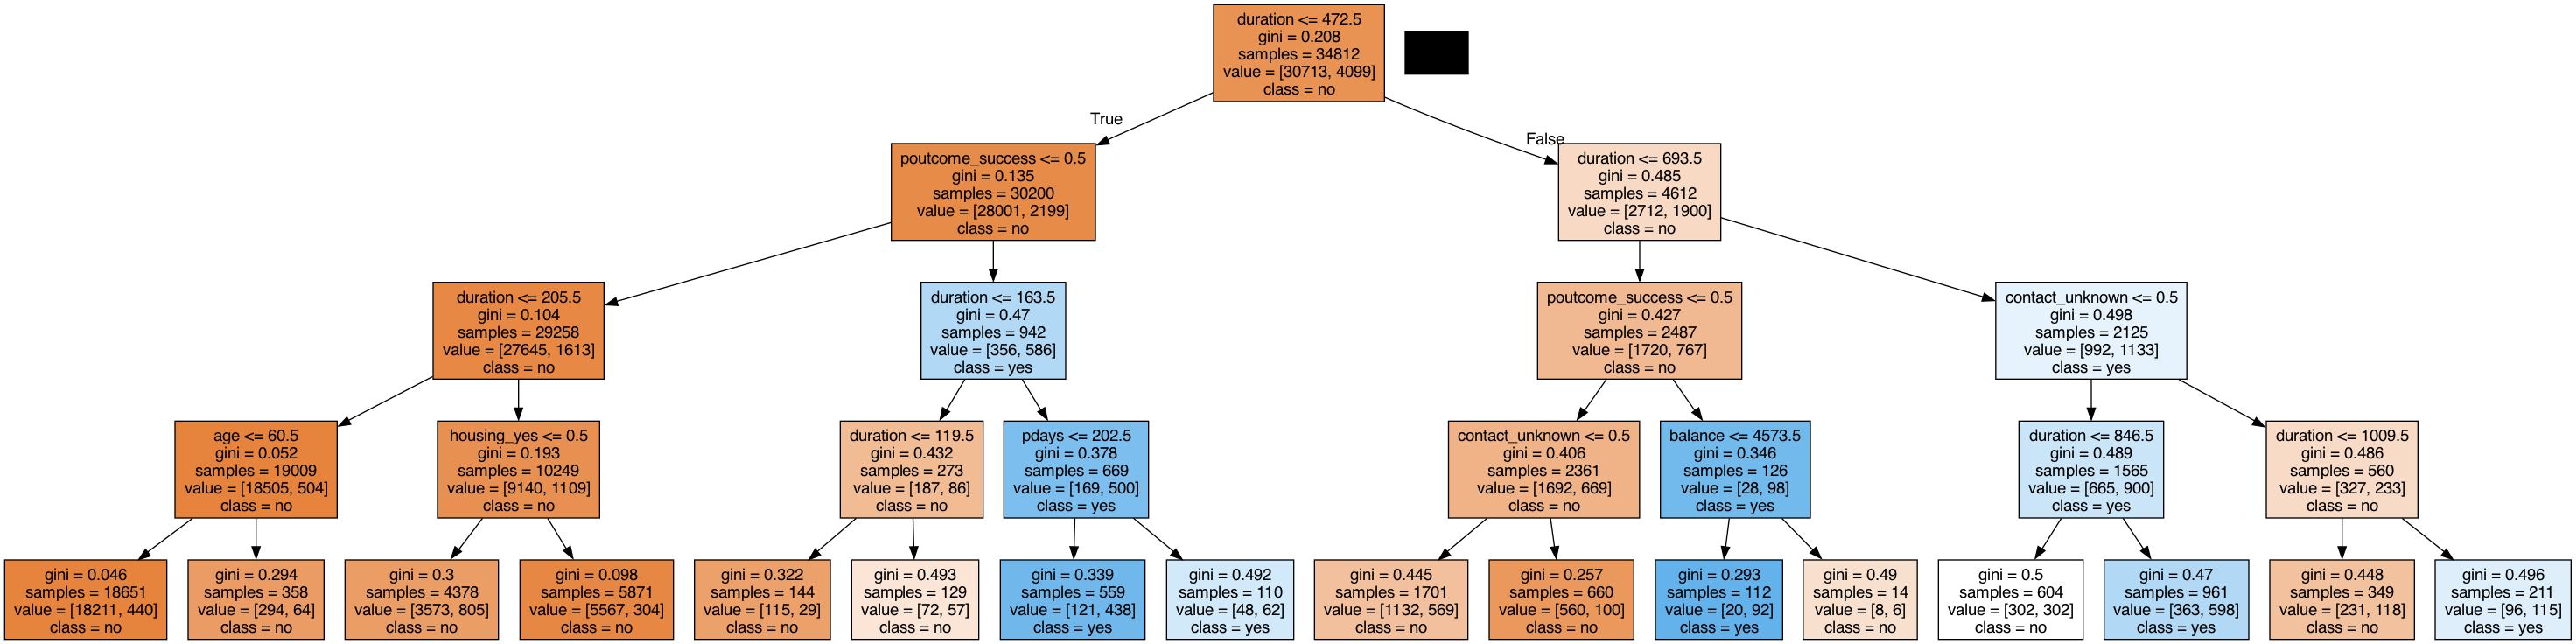

In [41]:
dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    feature_names=list(encoder.get_feature_names_out()) + numeric_columns,
    class_names=["no", "yes"],
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Dále vytvoř matici záměn a urči výši metriky accuracy.

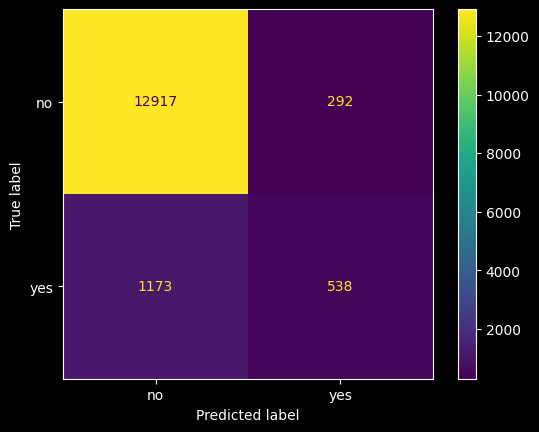

In [42]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [43]:
accuracy_score(y_test, y_pred)

0.9018096514745308

Vypočítej hodnotu vybrané metriky pro rozhodovací strom, který byl vytvořen v prvním bodě

In [44]:
# Na základě matice záměn se rozhodnu pro využítí metriky precision_score,
# Ta penalizuje označení špatných kandidátů na telefonický kontakt jako vhodných.

precision_score(y_test, y_pred, pos_label="yes")

0.6481927710843374

---

## K Nearest Neighbours

Využij algoritmus K Nearest Neighbours k predikci, zda si klient/klientka založí termínovaný účet. 

Využij všechny vstupní proměnné, s výjimkou proměnných day a month. 


Kategoriální proměnné uprav pomocí OneHotEncoder (tj. stejně jako u rozhodovacího stormu).

In [58]:
encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

 

Na číselné proměnné tentokrát použij StandardScaler. 


In [59]:
scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[numeric_columns])

In [60]:
X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Pomocí cyklu (nebo pomocí GridSearchCV) urči počet uvažovaných sousedů, které algoritmus bere v úvahu.

 Uvažuj následující hodnoty parametru: 3, 7, 11, 15, 19, 23. 
 
 Jaká je nejlepší hodnota metriky? 
 
 A je lepší než u rozhodovacího stromu?

In [48]:
ks = [3, 7, 11, 15, 19, 23]
precision_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision_scores.append(precision_score(y_test, y_pred, pos_label="yes"))

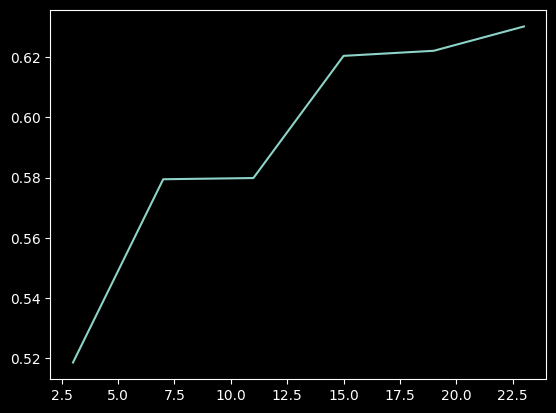

In [50]:
plt.plot(ks, precision_scores)

In [62]:
# We import make_scorer from sklearn.metrics to create a scorer object for the precision metric.
# Then, we pass this scorer to the scoring parameter of GridSearchCV.

model = KNeighborsClassifier()
params = {"n_neighbors": [3, 7, 11, 15, 19, 23]}

scorer = make_scorer(precision_score, pos_label="yes")
clf = GridSearchCV(model, params, scoring=scorer)
clf.fit(X, y)

print(clf.best_params_)
print(round(clf.best_score_, 2))

{'n_neighbors': 19}
0.56


---

## Support Vector Machine

Jako druhý využij algoritmus Support Vector Machine. 

Využij lineární verzi, tj. LinearSVC. 

Algoritmus využij s výchozími hodnotami parametrů, tj. nemusíš zkoušet různé hodnoty parametrů. 

Vypočti hodnotu požadované metriky.

In [51]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/entiaperse/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [52]:
precision_score(y_test, y_pred, pos_label="yes")

0.6617842876165113

Porovnej hodnoty metrik pro rozhodovací strom, K Nearest Neighbours a Support Vector Machine. 

Ve kterém z bodů jsme dosáhli nejvyšší hodnoty metriky?

In [ ]:
# precision_score

# DecisionTreeClassifier: 0.65
# KNeighborsClassifier: 0.63
# LinearSVC(): 0.66

---

## Bonus: 

Pomocí cyklu vyzkoušej další možné výšky rozhodovacího stromu, například v rozmezí 5 až 12.

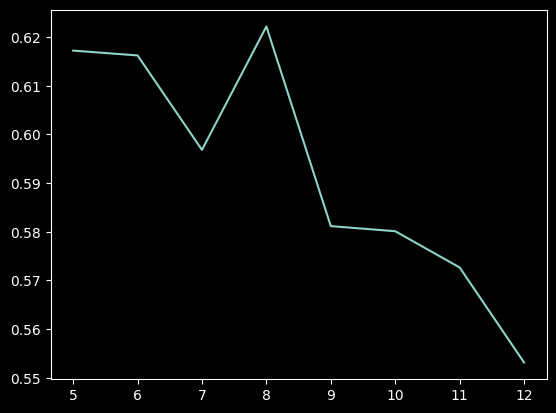

In [63]:
depths = range(5, 13)
precision_scores = []

for d in depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=d)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision_scores.append(precision_score(y_test, y_pred, pos_label="yes"))

plt.plot(depths, precision_scores)

In [55]:
model = DecisionTreeClassifier()
params = {"max_depth": [5, 6, 7, 8, 9, 12], "min_samples_split": [10, 20, 30, 40]}

clf = GridSearchCV(model, params, scoring="accuracy")
clf.fit(X, y)

print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 7, 'min_samples_split': 40}
0.8800564932610563
